In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random
from shapely.geometry import Point
from shapely import contains_xy

# Import functions from functions.py
from functions import generate_random_location_within_map_domain, get_flood_depth, calculate_basic_flood_damage, floodplain_multipolygon
import networkx as nx
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa import batch_run
import geopandas as gpd
import rasterio as rs
import matplotlib.pyplot as plt
# Import the agent class(es) from agents.py
from agents import Households
from agents import Government
from rbb import OrganizationInstrument

# Import functions from functions.py
from functions import get_flood_map_data, calculate_basic_flood_damage
from functions import map_domain_gdf, floodplain_gdf

from model import AdaptationModel

In [2]:
params_basecase = {
    "seed": None,
    "options_list": None,
    "number_of_households": 100,
    "flood_map_choice": 'harvey',
    "network": 'watts_strogatz', #["erdos_renyi", "barabasi_albert", "watts_strogatz"],
    "probability_of_network_connection": 0.4,
    "number_of_edges" : 3,"number_of_nearest_neighbours" : 5,

    "flood_probability" : 0.05,
    "economic_status": 'neutral',
    "intention_action_gap" : 0.3,
    "low_threshold" : 0.6,
    "medium_threshold" : 0.7,
    "high_threshold" : 0.8,
    "upper_budget_threshold" : 7000,
    "lower_budget_threshold" : 3000,
    "elevation_time" : 4,
    "elevation_cost" : 5000,
    "elevation_protection" : 0.3,
    "elevation_effectiveness" : 1,
    "wet_proofing_time" : 2,
    "wet_proofing_cost" : 3000,
    "wet_proofing_effectiveness" : 0.4,
    "dry_proofing_time" : 1,
    "dry_proofing_cost" : 1500,
    "dry_proofing_protection" : 1,
    "dry_proofing_effectiveness" : 0.85,
    "max_damage_costs" : 5000,
    "flood_risk_threshold": 1.5,
    "public_concern_threshold": 0.6,
    "damage_threshold": 0.3,
    "high_risk_bound": 2.9,
    "lower_risk_bound": 1.9,
    "gov_detector": 0,
    "gov_structure": 'centralised',
          }

In [3]:
parameters = ["intention_action_gap", "low_threshold",
              "medium_threshold", "high_threshold",
              "upper_budget_threshold", "lower_budget_threshold",
              "max_damage_costs", "flood_risk_threshold",
              "public_concern_threshold", "damage_threshold",
              "high_risk_bound", "lower_risk_bound"]

In [4]:
for p in parameters:
    params = params_basecase.copy()
    params[p] = [0.8*params_basecase[p], 1.2*params_basecase[p]]
    results = batch_run(
    AdaptationModel,
    parameters=params,
    iterations=70,
    max_steps=120,
    number_processes=1,
    data_collection_period=1,
    display_progress=True)
    df = pd.DataFrame(results)
    df.to_csv(f'dataframes/Final_Results_{p}_n70.csv')

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

In [6]:
df_gap = pd.read_csv('dataframes/Results_intention_action_gap_n70.csv')
df_lowthreshold = pd.read_csv('dataframes/Results_low_threshold_n70.csv')
df_mediumthreshold = pd.read_csv('dataframes/Results_medium_threshold_n70.csv')
df_highthreshold = pd.read_csv('dataframes/Results_high_threshold_n70.csv')
df_upper_budget_threshold = pd.read_csv('dataframes/Results_upper_budget_threshold_n70.csv')
df_lower_budget_threshold = pd.read_csv('dataframes/Results_lower_budget_threshold_n70.csv')
df_max_damage_costs = pd.read_csv('dataframes/Results_max_damage_costs_n70.csv')
df_flood_risk_threshold = pd.read_csv('dataframes/Results_flood_risk_threshold_n70.csv')
df_public_concern_threshold = pd.read_csv('dataframes/Results_public_concern_threshold_n70.csv')
df_damage_threshold = pd.read_csv('dataframes/Results_damage_threshold_n70.csv')
df_high_risk_bound = pd.read_csv('dataframes/Results_high_risk_bound_n70.csv')
df_lower_risk_bound = pd.read_csv('dataframes/Results_lower_risk_bound_n70.csv')

In [7]:
df_gap_subset = df_gap[['iteration', 'Step', 'intention_action_gap',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_gap_no_agent = df_gap_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_gap_last_steps = df_gap_no_agent[df_gap_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_gap_last_steps.rename(columns={'intention_action_gap': 'change'}, inplace=True)
df_gap_last_steps['change'].replace({0.8*params_basecase['intention_action_gap']: 0.8, 1.2*params_basecase['intention_action_gap']: 1.2}, inplace=True)
df_gap_final = df_gap_last_steps.assign(parameter='Intention Action Gap')

In [8]:
df_lowthreshold_subset = df_lowthreshold[['iteration', 'Step', 'low_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_lowthreshold_no_agent = df_lowthreshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_lowthreshold_last_steps = df_lowthreshold_no_agent[df_lowthreshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_lowthreshold_last_steps.rename(columns={'low_threshold': 'change'}, inplace=True)
df_lowthreshold_last_steps['change'].replace({0.8*params_basecase['low_threshold']: 0.8, 1.2*params_basecase['low_threshold']: 1.2}, inplace=True)
df_lowthreshold_final = df_lowthreshold_last_steps.assign(parameter='Low AM Threshold')

In [9]:
df_mediumthreshold_subset = df_mediumthreshold[['iteration', 'Step', 'medium_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_mediumthreshold_no_agent = df_mediumthreshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_mediumthreshold_last_steps = df_mediumthreshold_no_agent[df_mediumthreshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_mediumthreshold_last_steps.rename(columns={'medium_threshold': 'change'}, inplace=True)
df_mediumthreshold_last_steps['change'].replace({0.8*params_basecase['medium_threshold']: 0.8, 1.2*params_basecase['medium_threshold']: 1.2}, inplace=True)
df_mediumthreshold_final = df_mediumthreshold_last_steps.assign(parameter='Medium AM Threshold')

In [10]:
df_highthreshold_subset = df_highthreshold[['iteration', 'Step', 'high_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_highthreshold_no_agent = df_highthreshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_highthreshold_last_steps = df_highthreshold_no_agent[df_highthreshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_highthreshold_last_steps.rename(columns={'high_threshold': 'change'}, inplace=True)
df_highthreshold_last_steps['change'].replace({0.8*params_basecase['high_threshold']: 0.8, 1.2*params_basecase['high_threshold']: 1.2}, inplace=True)
df_highthreshold_final = df_highthreshold_last_steps.assign(parameter='High AM Threshold')

In [11]:
df_upper_budget_threshold_subset = df_upper_budget_threshold[['iteration', 'Step', 'upper_budget_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_upper_budget_threshold_no_agent = df_upper_budget_threshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_upper_budget_threshold_last_steps = df_upper_budget_threshold_no_agent[df_upper_budget_threshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_upper_budget_threshold_last_steps.rename(columns={'upper_budget_threshold': 'change'}, inplace=True)
df_upper_budget_threshold_last_steps['change'].replace({0.8*params_basecase['upper_budget_threshold']: 0.8, 1.2*params_basecase['upper_budget_threshold']: 1.2}, inplace=True)
df_upper_budget_threshold_final = df_upper_budget_threshold_last_steps.assign(parameter='Upper Budget Threshold')

In [12]:
df_lower_budget_threshold_subset = df_lower_budget_threshold[['iteration', 'Step', 'lower_budget_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_lower_budget_threshold_no_agent = df_lower_budget_threshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_lower_budget_threshold_last_steps = df_lower_budget_threshold_no_agent[df_lower_budget_threshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_lower_budget_threshold_last_steps.rename(columns={'lower_budget_threshold': 'change'}, inplace=True)
df_lower_budget_threshold_last_steps['change'].replace({0.8*params_basecase['lower_budget_threshold']: 0.8, 1.2*params_basecase['lower_budget_threshold']: 1.2}, inplace=True)
df_lower_budget_threshold_final = df_lower_budget_threshold_last_steps.assign(parameter='Lower Budget Threshold')

In [13]:
df_max_damage_costs_subset = df_max_damage_costs[['iteration', 'Step', 'max_damage_costs',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_max_damage_costs_no_agent = df_max_damage_costs_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_max_damage_costs_last_steps = df_max_damage_costs_no_agent[df_max_damage_costs_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_max_damage_costs_last_steps.rename(columns={'max_damage_costs': 'change'}, inplace=True)
df_max_damage_costs_last_steps['change'].replace({0.8*params_basecase['max_damage_costs']: 0.8, 1.2*params_basecase['max_damage_costs']: 1.2}, inplace=True)
df_max_damage_costs_final = df_max_damage_costs_last_steps.assign(parameter='Max Damage Costs')

In [14]:
df_flood_risk_threshold_subset = df_flood_risk_threshold[['iteration', 'Step', 'flood_risk_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_flood_risk_threshold_no_agent = df_flood_risk_threshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_flood_risk_threshold_last_steps = df_flood_risk_threshold_no_agent[df_flood_risk_threshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_flood_risk_threshold_last_steps.rename(columns={'flood_risk_threshold': 'change'}, inplace=True)
df_flood_risk_threshold_last_steps['change'].replace({0.8*params_basecase['flood_risk_threshold']: 0.8, 1.2*params_basecase['flood_risk_threshold']: 1.2}, inplace=True)
df_flood_risk_threshold_final = df_flood_risk_threshold_last_steps.assign(parameter='Flood Risk Threshold')

In [15]:
df_public_concern_threshold_subset = df_public_concern_threshold[['iteration', 'Step', 'public_concern_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_public_concern_threshold_no_agent = df_public_concern_threshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_public_concern_threshold_last_steps = df_public_concern_threshold_no_agent[df_public_concern_threshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_public_concern_threshold_last_steps.rename(columns={'public_concern_threshold': 'change'}, inplace=True)
df_public_concern_threshold_last_steps['change'].replace({0.8*params_basecase['public_concern_threshold']: 0.8, 1.2*params_basecase['public_concern_threshold']: 1.2}, inplace=True)
df_public_concern_threshold_final = df_public_concern_threshold_last_steps.assign(parameter='Public Concern Threshold')

In [16]:
df_damage_threshold_subset = df_damage_threshold[['iteration', 'Step', 'damage_threshold',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_damage_threshold_no_agent = df_damage_threshold_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_damage_threshold_last_steps = df_damage_threshold_no_agent[df_damage_threshold_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_damage_threshold_last_steps.rename(columns={'damage_threshold': 'change'}, inplace=True)
df_damage_threshold_last_steps['change'].replace({0.8*params_basecase['damage_threshold']: 0.8, 1.2*params_basecase['damage_threshold']: 1.2}, inplace=True)
df_damage_threshold_final = df_damage_threshold_last_steps.assign(parameter='Damage Threshold')

In [17]:
df_high_risk_bound_subset = df_high_risk_bound[['iteration', 'Step', 'high_risk_bound',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_high_risk_bound_no_agent = df_high_risk_bound_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_high_risk_bound_last_steps = df_high_risk_bound_no_agent[df_high_risk_bound_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_high_risk_bound_last_steps.rename(columns={'high_risk_bound': 'change'}, inplace=True)
df_high_risk_bound_last_steps['change'].replace({0.8*params_basecase['high_risk_bound']: 0.8, 1.2*params_basecase['high_risk_bound']: 1.2}, inplace=True)
df_high_risk_bound_final = df_high_risk_bound_last_steps.assign(parameter='High Risk Bound')

In [18]:
df_lower_risk_bound_subset = df_lower_risk_bound[['iteration', 'Step', 'lower_risk_bound',
                        'Average Adaptation Motivation', 'Average flood damage',
                        'total_decisions_to_adapt', 'total_adapted_households']]
df_lower_risk_bound_no_agent = df_lower_risk_bound_subset.drop_duplicates().reset_index().drop(columns=['index'])
df_lower_risk_bound_last_steps = df_lower_risk_bound_no_agent[df_lower_risk_bound_no_agent['Step'] == 120].reset_index().drop(columns=['index'])
df_lower_risk_bound_last_steps.rename(columns={'lower_risk_bound': 'change'}, inplace=True)
df_lower_risk_bound_last_steps['change'].replace({0.8*params_basecase['lower_risk_bound']: 0.8, 1.2*params_basecase['lower_risk_bound']: 1.2}, inplace=True)
df_lower_risk_bound_final = df_lower_risk_bound_last_steps.assign(parameter='Lower Risk Bound')

In [19]:
merged_df = pd.concat([df_gap_final, df_lowthreshold_final,
                           df_mediumthreshold_final, df_highthreshold_final,
                           df_upper_budget_threshold_final, df_lower_budget_threshold_final,
                           df_max_damage_costs_final, df_flood_risk_threshold_final,
                           df_public_concern_threshold_final, df_damage_threshold_final,
                           df_high_risk_bound_final, df_lower_risk_bound_final])
merged_df

,iteration,Step,change,Average Adaptation Motivation,Average flood damage,total_decisions_to_adapt,total_adapted_households,parameter
0,0,120,0.8,0.651683,0.540847,0,48,Intention Action Gap
1,0,120,1.2,0.648915,0.583587,0,50,Intention Action Gap
2,1,120,0.8,0.645787,0.531306,0,48,Intention Action Gap
3,1,120,1.2,0.669536,0.352273,0,53,Intention Action Gap
4,2,120,0.8,0.638019,0.503942,0,52,Intention Action Gap
...,...,...,...,...,...,...,...,...
135,67,120,1.2,0.635687,0.464059,0,45,Lower Risk Bound
136,68,120,0.8,0.628579,0.537778,0,45,Lower Risk Bound
137,68,120,1.2,0.630826,0.462793,0,48,Lower Risk Bound
138,69,120,0.8,0.651362,0.588524,0,46,Lower Risk Bound


In [20]:
merged_df.to_csv('dataframes/Final_Dataframe_variability_test_n70.csv')

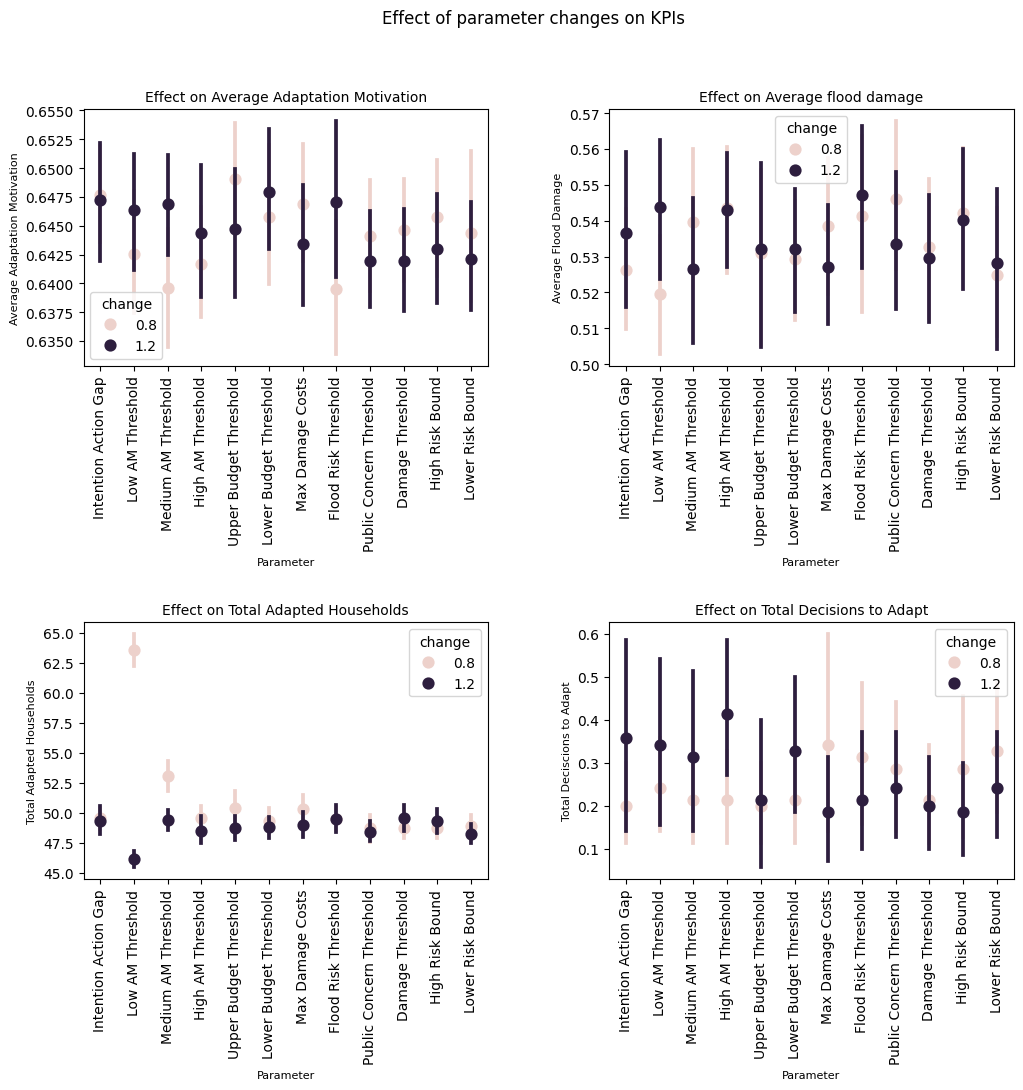

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Effect of parameter changes on KPIs')

sns.pointplot(data=merged_df, x='parameter', y="Average Adaptation Motivation", hue="change", linestyle='none', ax=ax1)
ax1.set_title('Effect on Average Adaptation Motivation', fontsize=10)
ax1.set_xlabel('Parameter', fontsize=8)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Average Adaptation Motivation', fontsize=8)

sns.pointplot(data=merged_df, x='parameter', y="Average flood damage", hue="change", linestyle='none', ax=ax2)
ax2.set_title('Effect on Average flood damage', fontsize=10)
ax2.set_xlabel('Parameter', fontsize=8)
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Average Flood Damage', fontsize=8)

sns.pointplot(data=merged_df, x='parameter', y="total_adapted_households", hue="change", linestyle='none', ax=ax3)
ax3.set_title('Effect on Total Adapted Households', fontsize=10)
ax3.set_xlabel('Parameter', fontsize=8)
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Total Adapted Households', fontsize=8)

sns.pointplot(data=merged_df, x='parameter', y="total_decisions_to_adapt", hue="change", linestyle='none', ax=ax4)
ax4.set_title('Effect on Total Decisions to Adapt', fontsize=10)
ax4.set_xlabel('Parameter', fontsize=8)
ax4.tick_params(axis='x', rotation=90)
ax4.set_ylabel('Total Deciscions to Adapt', fontsize=8)

plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=0.3)
plt.savefig("figures/Effect of parameter changes on KPIs Final.png", dpi=100, bbox_inches='tight')
plt.show()